In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-01-02  48.149918  49.276493  47.577135  49.225514  411254000
2024-01-03  47.551144  48.165911  47.302237  47.467176  320896000
2024-01-04  47.979984  48.481795  47.490167  47.749068  306535000
2024-01-05  49.078564  49.528395  48.287860  48.443804  415039000
2024-01-08  52.233383  52.255378  49.460426  49.493415  642510000


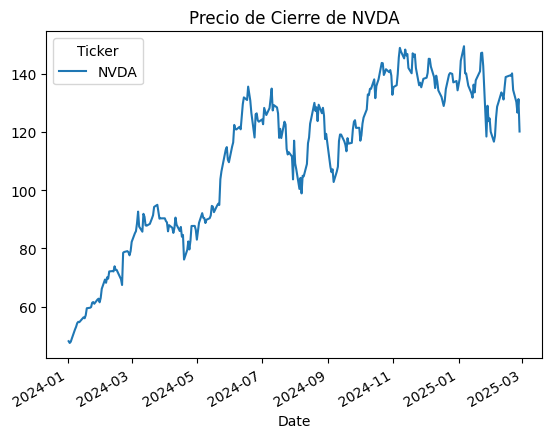

In [ ]:
# 1. Especificar el ticker de la acción
ticker = 'NVDA'  # Aquí puedes poner el ticker que desees, por ejemplo, AAPL para Apple

# 2. Descargar los precios históricos usando yfinance
data = yf.download(ticker, start="2024-01-01", end="2025-02-28")  # Especificamos el rango de fechas

# 3. Visualizar los primeros registros
print(data.head())

# 4. Opcional: Graficar los precios de cierre
import matplotlib.pyplot as plt

data['Close'].plot(title=f"Precio de Cierre de {ticker}")
plt.show()

In [ ]:
data.columns = data.columns.get_level_values(0)

In [ ]:
#Vemos la estructura de los datos
data[data.index>'2024-01-01'].head()


Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,48.149918,49.276493,47.577135,49.225514,411254000
2024-01-03,47.551144,48.165911,47.302237,47.467176,320896000
2024-01-04,47.979984,48.481795,47.490167,47.749068,306535000
2024-01-05,49.078564,49.528395,48.287860,48.443804,415039000
2024-01-08,52.233383,52.255378,49.460426,49.493415,642510000


In [ ]:
data['retornos']=(data['Close'] / data['Close'].shift(1)).apply(lambda x: np.log(x))
data.head()

Price,Close,High,Low,Open,Volume,retornos
Date,,,,,,
2024-01-02,48.149918,49.276493,47.577135,49.225514,411254000,NaN
2024-01-03,47.551144,48.165911,47.302237,47.467176,320896000,-0.012514
2024-01-04,47.979984,48.481795,47.490167,47.749068,306535000,0.008978
2024-01-05,49.078564,49.528395,48.287860,48.443804,415039000,0.022638
2024-01-08,52.233383,52.255378,49.460426,49.493415,642510000,0.062299


In [ ]:
#Metodo 1
N=len(data)-1 #Menos 1 porque el primer elemento no tiene retorno
mu=data['retornos'].sum()/N
print('el parametro mu del modelo es: ', mu)

el parametro mu del modelo es:  0.003163770232705347


In [ ]:
#Metodo 2
data['retornos'].mean()

np.float64(0.003163770232705347)

In [ ]:
#Metodo 1
N = len(data['retornos']) -1 # Número total de retornos
sigma = np.sqrt(np.sum((data['retornos'] - mu)**2) / (N - 1))
print('el parametro sigma del modelo es: ', sigma)

el parametro sigma del modelo es:  0.03489756280011408


In [ ]:
#Metodo 2
sigma = data['retornos'].std()
sigma

0.034897562800114086

In [ ]:
#Procedemos a crear una funcion que modele el proceso estocastico
def MGB_acciones(mu,sigma,data,col_name,steps):

    #Los parametros de la funcion son:
    #mu -> Tasa de crecimiento esperada
    #sigma -> volatilidad del activo
    #data -> pandas df que contiene los retornos logaritmicos del activo en dias
    #col_name -> nombre de la columna de los retornos
    #steps -> numero de pasos hacia adelante en el proceso estocastico

    dt=1/252 # son solo 252 dias de traiding en el año.
    s0=data[col_name].iloc[-1] #Tomamos el ultimo elemento de los precios, ya que este sera el punto de partida
    et_vector=np.random.normal(loc=0, scale=1, size=steps) # Vector de numeros aletorios de media 0 y desviacion estandar 1
    exp_vector = np.exp((mu - (sigma**2) / 2) * dt + sigma * et_vector * np.sqrt(dt))

    st_1=[]

    for i in range(0,steps):

        if i==0:
            s=s0*exp_vector[0]
        else:
            s=st_1[i-1]*exp_vector[i]

        st_1.append(s)


    return st_1

#Probamos la funcion
#MGB_acciones(mu, sigma, data, 'Adj Close',252)

In [ ]:
# Funcion que realiza graficos de lineas
def lineas_multiples(data, title='Gráfico de Múltiples Líneas', xlabel='Eje X', ylabel='Eje Y'):
    """
    Función para graficar múltiples líneas con colores aleatorios.

    Parámetros:
    - data: DataFrame de pandas con los datos a graficar.
    - title: Título del gráfico.
    - xlabel: Etiqueta del eje X.
    - ylabel: Etiqueta del eje Y.
    """
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    num_lines = data.shape[1]  # Número de líneas (columnas en el DataFrame)

    # Generar un color aleatorio para cada línea
    colors = np.random.rand(num_lines, 3)  # Colores aleatorios en RGB

    for i in range(num_lines):
        plt.plot(np.arange(1, data.shape[0] + 1), data.iloc[:, i], color=colors[i], label=f'Línea {i + 1}')  # Acceso corregido

    # Configurar título y etiquetas
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Mostrar la cuadrícula
    plt.grid(True)

    # Mostrar leyenda
    #plt.legend()

    # Mostrar el gráfico
    plt.show()

In [ ]:
# Ahora simulamos 500 veces cual podria ser el comportamiento del activo el proximo año
Montecarlo_results = pd.DataFrame()

sim=500

for i in range(0,sim):

    print(i)

    Montecarlo_results['sim_'+str(i)]=pd.concat([data['Close'],pd.Series(MGB_acciones(mu, sigma, data, 'Close',252))],ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<ipython-input-20-dca783bb424e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([data['Close'],pd.Series(MGB_acciones(mu, sigma, data, 'Close',252))],ignore_index=True)
<ipython-input-20-dca783bb424e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Montecarlo_results['sim_'+str(i)]=pd.concat([data['Close'],pd.Series(MGB_acciones(mu, sigma, data, 'Close',252))],ignore_index=True)
<ipython-input-20-dca783bb424e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually

376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499


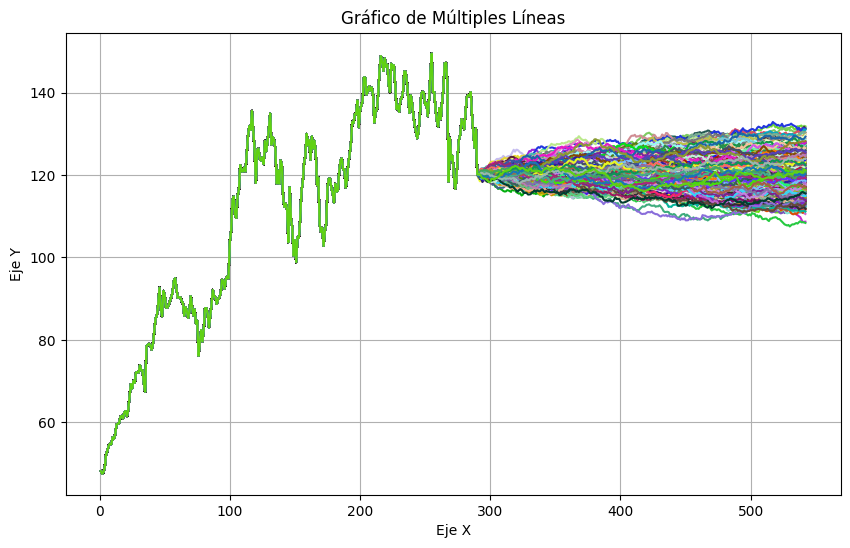

In [ ]:
#Graficamos
lineas_multiples(Montecarlo_results, title='Gráfico de Múltiples Líneas', xlabel='Eje X', ylabel='Eje Y')

In [ ]:
#Calculamos la probabilidad de perder 5% de la inversion inicial en el próximo año
s0=data['Close'].iloc[-1]
print('El precio de compra es: ', s0)

El precio de compra es:  120.13895416259766


In [ ]:
Montecarlo_results.tail()

,sim_0,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,sim_7,sim_8,sim_9,...,sim_490,sim_491,sim_492,sim_493,sim_494,sim_495,sim_496,sim_497,sim_498,sim_499
537,118.899919,122.210775,119.327379,110.865615,126.634468,118.204294,112.647619,124.178734,122.367565,114.734838,...,119.120900,117.511231,120.394558,120.313042,120.781183,122.718155,115.448108,120.134929,123.472796,120.859201
538,119.099270,122.008475,119.744126,111.080036,126.820162,118.720135,112.900560,123.952967,122.377416,114.647453,...,119.200486,117.227352,120.894163,120.518183,120.941243,122.918905,115.791595,119.955867,123.702643,120.635692
539,118.903102,121.920364,119.487898,110.834703,126.747201,118.924680,112.816675,124.055552,122.816989,114.350994,...,119.167391,117.012103,121.056993,120.891836,120.641060,122.993074,115.894889,120.000116,123.590303,120.519270
540,119.048048,121.487222,119.230187,110.725973,126.846231,118.631326,112.738827,124.276665,122.704185,114.665262,...,119.299694,117.436477,121.042782,120.819182,120.505050,122.849441,115.667697,120.018612,123.950618,121.115109
541,119.529289,121.699652,119.158570,110.545946,126.805260,119.146505,112.562880,123.795056,122.461788,115.345545,...,119.283640,117.119560,121.039441,120.987083,120.586071,122.362341,115.526796,120.204024,123.908395,121.198924


In [ ]:
precios_cierre = Montecarlo_results.iloc[-1,:] #Seleccionamos los precios finales a un año de inversion
precios_cierre

,541
sim_0,119.529289
sim_1,121.699652
sim_2,119.158570
sim_3,110.545946
sim_4,126.805260
...,...
sim_495,122.362341
sim_496,115.526796
sim_497,120.204024
sim_498,123.908395


In [ ]:
#Probabilidad de perdida del 5%

total=len(precios_cierre)
exito=len(precios_cierre[precios_cierre<(s0*0.95)])

p=exito/total

print(p*100,'%')

7.199999999999999 %


In [ ]:
#Probabilidad de ganar el 10% de la inversion

total=len(precios_cierre)
gananciax10p =(precios_cierre > (s0*1.1)).sum()

p_ganancia = gananciax10p/total

print(p_ganancia*100,'%')

0.0 %


In [ ]:
#Probabilidad de perder el 10% de la inversion

total=len(precios_cierre)
perdidax10p =(precios_cierre < (s0*0.90)).sum()

p_perdida = perdidax10p/total

print(p_perdida*100,'%')

0.0 %
